<a href="https://colab.research.google.com/github/HopeRetina/text-gen/blob/main/text_gen_GRU_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this project I trained an RNN model (GRU) to generate text based on an Edith Wharten book- The House of Mirth.

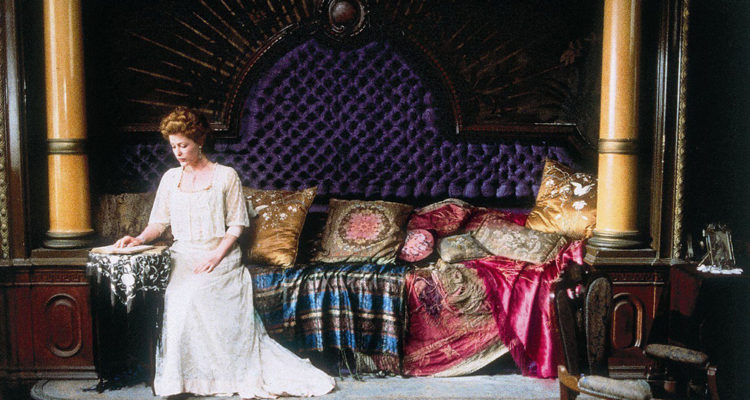

##Setup

In [15]:
import tensorflow as tf

import numpy as np
import os
import time

##Download dataset

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/MyDrive/data_collection/

/content/drive/MyDrive/data_collection


In [22]:
filename = 'houseOfMirth.txt'
text = open(filename, 'r', encoding='utf-8').read()
# text = text.lower()
print(text[:1000])



The House of Mirth

BY

EDITH WHARTON




                          BOOK ONE


Chapter 1

Selden paused in surprise. In the afternoon rush of the Grand Central
Station his eyes had been refreshed by the sight of Miss Lily Bart.

It was a Monday in early September, and he was returning to his work from
a hurried dip into the country; but what was Miss Bart doing in town at
that season? If she had appeared to be catching a train, he might have
inferred that he had come on her in the act of transition between one and
another of the country-houses which disputed her presence after the close
of the Newport season; but her desultory air perplexed him. She stood
apart from the crowd, letting it drift by her to the platform or the
street, and wearing an air of irresolution which might, as he surmised,
be the mask of a very definite purpose. It struck him at once that she
was waiting for some one, but he hardly knew why the idea arrested him.
There was nothing new about Lily Bart, yet he coul

In [24]:
print(f'Length of text: {len(text)} characters')

Length of text: 749824 characters


In [ ]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [ ]:
type(path_to_file)

str

##Read the data

In [ ]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [ ]:
type(text)

str

In [ ]:
# Take a look at the first 250 characters in text
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [25]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

79 unique characters


#Process the text

##Vectorize

In [27]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [26]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

In [28]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[54, 55, 56, 57, 58, 59, 60], [77, 78, 79]]>

In [29]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

In [30]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [31]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'xyz'], dtype=object)

In [32]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

##Creating training examples and targets

In [33]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(749824,), dtype=int64, numpy=array([ 1,  1, 48, ..., 72, 13,  1])>

In [34]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [36]:
for ids in ids_dataset.take(30):
    print(chars_from_ids(ids).numpy().decode('utf-8'))





T
h
e
 
H
o
u
s
e
 
o
f
 
M
i
r
t
h




B
Y




E
D
I
T


In [37]:
seq_length = 100

In [38]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'\n' b'\n' b'T' b'h' b'e' b' ' b'H' b'o' b'u' b's' b'e' b' ' b'o' b'f'
 b' ' b'M' b'i' b'r' b't' b'h' b'\n' b'\n' b'B' b'Y' b'\n' b'\n' b'E' b'D'
 b'I' b'T' b'H' b' ' b'W' b'H' b'A' b'R' b'T' b'O' b'N' b'\n' b'\n' b'\n'
 b'\n' b'\n' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' '
 b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' ' b' '
 b'B' b'O' b'O' b'K' b' ' b'O' b'N' b'E' b'\n' b'\n' b'\n' b'C' b'h' b'a'
 b'p' b't' b'e' b'r' b' ' b'1' b'\n' b'\n' b'S' b'e' b'l' b'd' b'e' b'n'
 b' ' b'p' b'a'], shape=(101,), dtype=string)


In [39]:
for seq in sequences.take(7):
  print(text_from_ids(seq).numpy())

b'\n\nThe House of Mirth\n\nBY\n\nEDITH WHARTON\n\n\n\n\n                          BOOK ONE\n\n\nChapter 1\n\nSelden pa'
b'used in surprise. In the afternoon rush of the Grand Central\nStation his eyes had been refreshed by t'
b'he sight of Miss Lily Bart.\n\nIt was a Monday in early September, and he was returning to his work fro'
b'm\na hurried dip into the country; but what was Miss Bart doing in town at\nthat season? If she had app'
b'eared to be catching a train, he might have\ninferred that he had come on her in the act of transition'
b' between one and\nanother of the country-houses which disputed her presence after the close\nof the New'
b'port season; but her desultory air perplexed him. She stood\napart from the crowd, letting it drift by'


In [40]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [42]:
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [43]:
dataset = sequences.map(split_input_target)

In [44]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'\n\nThe House of Mirth\n\nBY\n\nEDITH WHARTON\n\n\n\n\n                          BOOK ONE\n\n\nChapter 1\n\nSelden p'
Target: b'\nThe House of Mirth\n\nBY\n\nEDITH WHARTON\n\n\n\n\n                          BOOK ONE\n\n\nChapter 1\n\nSelden pa'


##Create training batches

In [45]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

##Build the model

---



In [46]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [52]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [53]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [49]:
class LSTMModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.lstm = tf.keras.layers.LSTM(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.lstm.get_initial_state(x)
    x, states = self.lstm(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [50]:
model = LSTMModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

##Try the model

---



In [54]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 80) # (batch_size, sequence_length, vocab_size)


In [55]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  20480     
                                                                 
 gru_1 (GRU)                 multiple                  3938304   
                                                                 
 dense_2 (Dense)             multiple                  82000     
                                                                 
Total params: 4,040,784
Trainable params: 4,040,784
Non-trainable params: 0
_________________________________________________________________


In [56]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [57]:
sampled_indices

array([76, 37, 25, 22, 66, 58, 55, 58, 55,  7, 72, 24,  2, 31, 28, 21, 45,
       64, 54, 76,  8,  0, 78, 44, 46, 20,  4, 25, 34, 70, 73, 65, 79, 10,
       57, 24, 66, 19, 71,  4, 24, 38,  2,  2,  8, 10, 79, 50, 36, 55, 20,
       79, 17, 27, 34, 56, 21, 78, 18, 54, 41, 32, 14, 55, 40, 67, 69, 55,
       46, 17, 70, 62, 15, 60, 63, 22, 53, 61, 41, 12,  8, 68, 59,  8, 73,
       33, 46, 79, 62, 20,  4, 75,  5, 32,  6, 21, 25, 39, 48, 69])

In [58]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'nt\nKisco in her motor-car that morning, and had been kicking her heels for\nan hour at Garrisons, wit'

Next Char Predictions:
 b'wI:7mebeb\'s9 C@6Qkaw([UNK]yPR5":Fqtlz*d9m4r"9J  (*zVHb5z2?Fc6y3aMD/bLnpbR2qi0gj7YhM-(of(tERzi5"v$D%6:KTp'


##Train the model

In [59]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [60]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 80)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.3827105, shape=(), dtype=float32)


In [61]:
tf.exp(example_batch_mean_loss).numpy()

80.054726

In [62]:
model.compile(optimizer='adam', loss=loss)

##Configure checkpoints

In [63]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

###Execute the training

In [84]:
EPOCHS = 30

In [85]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
116/116 [==============================] - 8s 56ms/step - loss: 1.9451
Epoch 2/30
116/116 [==============================] - 7s 53ms/step - loss: 1.9471
Epoch 3/30
116/116 [==============================] - 7s 54ms/step - loss: 1.9569
Epoch 4/30
116/116 [==============================] - 7s 53ms/step - loss: 1.9671
Epoch 5/30
116/116 [==============================] - 7s 54ms/step - loss: 1.9848
Epoch 6/30
116/116 [==============================] - 7s 54ms/step - loss: 1.9740
Epoch 7/30
116/116 [==============================] - 7s 54ms/step - loss: 1.9685
Epoch 8/30
116/116 [==============================] - 7s 55ms/step - loss: 1.9610
Epoch 9/30
116/116 [==============================] - 7s 55ms/step - loss: 1.9591
Epoch 10/30
116/116 [==============================] - 7s 55ms/step - loss: 1.9540
Epoch 11/30
116/116 [==============================] - 7s 56ms/step - loss: 1.9531
Epoch 12/30
116/116 [==============================] - 8s 56ms/step - loss: 1.9642
Epoch 13/30
1

###Generate text

In [79]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [80]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [81]:
start = time.time()
states = None
next_char = tf.constant(['Lily'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

Lilyynk of moming they her
go have shou in
qulding to be
compulanssy. She
ving thou gre ato bent lien ownare nowersted way quricke--iour plixpereet she fuchy
cumubad thenor and
ancy.
Peing rre cary only had
oven tin locounter
ablliked the oner then anachity wase covere of he rawingat ofte ving had beenitspioued.
 husb have ter youll of with her hal that Miss Bal
the
mas one wrs o's flifelinping runexing oot;
a was of sinced, love's sale PENDESCOU ARRE FOREN bron aggigh sin mushy'mnot wa rooddy witht with as migll--infis
dright here liggly nonssion tees ress
cous mart it as the
tot and tornutey it elloppt--the ramaslat heal chand trem as
of Mis laugh. Then hishe scou no wellybed hadrearcy.

Theaturut of withsion of you mak tsse it san'th, her li, knows I ag yout! Bearge
whe kn'se hell benat
of outer froving in the mened my
Mrs. PENE TEBTRERBnstas ont. Andes thee addenceys stare
tcought fenat enthordmence. Gut a neritth--Mnd phamy cacet. Shenge
am but you the Penumpt ist ther thot the fa

###Export the generator

In [82]:
tf.saved_model.save(one_step_model, 'one_step')
one_step_reloaded = tf.saved_model.load('one_step')

INFO:tensorflow:Assets written to: one_step/assets


INFO:tensorflow:Assets written to: one_step/assets


In [83]:
states = None
next_char = tf.constant(['Lily'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))

Lilyren JECTEE--ther
steshed ad I
deaved buste Lily muturle stectilie
come to a geit, unfeeninglinche
gr


##Customized training

In [86]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
      inputs, labels = inputs
      with tf.GradientTape() as tape:
          predictions = self(inputs, training=True)
          loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))

      return {'loss': loss}

In [87]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [88]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [89]:
model.fit(dataset, epochs=1)

116/116 [==============================] - 11s 52ms/step - loss: 2.8337


In [90]:
EPOCHS = 10

mean = tf.metrics.Mean()

for epoch in range(EPOCHS):
    start = time.time()

    mean.reset_states()
    for (batch_n, (inp, target)) in enumerate(dataset):
        logs = model.train_step([inp, target])
        mean.update_state(logs['loss'])

        if batch_n % 50 == 0:
            template = f"Epoch {epoch+1} Batch {batch_n} Loss {logs['loss']:.4f}"
            print(template)

    # saving (checkpoint) the model every 5 epochs
    if (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print()
    print(f'Epoch {epoch+1} Loss: {mean.result().numpy():.4f}')
    print(f'Time taken for 1 epoch {time.time() - start:.2f} sec')
    print("_"*80)

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 2.3278
Epoch 1 Batch 50 Loss 2.1660
Epoch 1 Batch 100 Loss 2.0209

Epoch 1 Loss: 2.1574
Time taken for 1 epoch 10.24 sec
________________________________________________________________________________
Epoch 2 Batch 0 Loss 2.0037
Epoch 2 Batch 50 Loss 1.9039
Epoch 2 Batch 100 Loss 1.8001

Epoch 2 Loss: 1.8671
Time taken for 1 epoch 6.61 sec
________________________________________________________________________________
Epoch 3 Batch 0 Loss 1.7777
Epoch 3 Batch 50 Loss 1.6362
Epoch 3 Batch 100 Loss 1.6318

Epoch 3 Loss: 1.6627
Time taken for 1 epoch 6.59 sec
________________________________________________________________________________
Epoch 4 Batch 0 Loss 1.5633
Epoch 4 Batch 50 Loss 1.5324
Epoch 4 Batch 100 Loss 1.4870

Epoch 4 Loss: 1.5147
Time taken for 1 epoch 6.61 sec
________________________________________________________________________________
Epoch 5 Batch 0 Loss 1.4717
Epoch 5 Batch 50 Loss 1.4006
Epoch 5 Batch 100 Loss 1.3996

Epoch 5 Loss: 1.4110
Ti